# Masters' in Applied Artificial Intelligence
## Machine Learning Algorithms Course

Notebooks for MLA course

by [*lufer*](mailto:lufer@ipca.pt)

---



# ML Modelling - Part III

**Contents**:

1.  Spliting Datasets
2.  Data Correlation
3.  **More Dataset Analysis**
4.  **Feature Scalling**
5.  ...


# 0 - Environment preparation


### Importing necessary Libraries

In [ ]:
#!pip install pandas-profiling

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#from pandas_profiling import ProfileRepor   #see https://www.kaggle.com/discussions/general/233785
#from scipy import stats

Mounting Drive

In [4]:

from google.colab import drive

# it will ask for your google drive credentiaals
drive.mount('/content/gDrive/', force_remount=True)

Mounted at /content/gDrive/


# 1 - Spliting Datasets

See [4_Data_Manipulation_Modelling_I.ipynb](https://colab.research.google.com/drive/1YsZPCFfbobK-1jVnv2o0j7kLtZgn42dB#scrollTo=c1kf9qddTM4D)


# 2 - Correlations in Dataset


see [4_Data_Manipulation_Modelling_II.ipynb](https://colab.research.google.com/drive/1IsIsS4bPw7PM287GHHe4MkIalIm16W7P#scrollTo=c1kf9qddTM4D)


# 3 - Features Manipulation (cont.)

## Turn Features into Numerical Values

It is essencial to get the data ready! For instance, is to necessary to assure that all features are numerical values!


Data transforms can be performed using the scikit-learn library; for example, the `SimpleImputer` class can be used to replace missing values, the `MinMaxScaler` class can be used to scale numerical values, and the `OneHotEncoder` can be used to encode categorical variables

### *Loading dataset*

In [115]:
import os
#print(os.getcwd())

filePath='/content/gDrive/MyDrive/MIA/ColabNotebooks/Datasets/'
cs = pd.read_csv(filePath+"car-sales-extended.csv")
pd.set_option("display.precision", 2)

In [38]:
cs.head()

Make Colour  Odometer (KM)  Doors  Price
0   Honda  White          35431      4  15323
1     BMW   Blue         192714      5  19943
2   Honda  White          84714      4  28343
3  Toyota  White         154365      4  13434
4  Nissan   Blue         181577      3  14043

It is possible to realize that *two columns (features) are categorical data*: "Make" and "Colour"

In [5]:
cs.dtypes

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

### *Splitting Dataset*

"Price" is the target feature:

*X = all comuns except "Price"*\
*y = Labels column ("Price")*

In [8]:
from sklearn.model_selection import train_test_split
#Split into X/y
X=cs.drop("Price", axis=1)
y=cs['Price']

#Split into to trainnig and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
# consider stratification
#                                                    stratify=y)
# what happens?

### Check Train and Test Datasets

In [ ]:
# X = 80%
X_train.head()

In [ ]:
# y=20%
y_test.head()

*How many categories we have?*\

Four categories:`Make`, `Colour`, `Odometer (KM)`, `Doors`

Can "Doors" be a category?

In [ ]:
#check Doors values distribution
cs["Doors"].value_counts()

Answer: Yes it can be seen as a category using labels "4", "5", "3"

### *Convert categories in numbers*

**Note:** Many datasets contain features of different types, say text, floats, and dates, where each type of feature requires separate preprocessing or feature extraction steps.

One can explore many possibilities:

*   Using `replace()`function
*   Using the `SimpleImputer`class
*   Using `get_dummies()` function
*   Using `OneHotEncoder`
*   Using `Label Encoding`

---

\

**Option 1: replace()**

In [42]:
# using replace() function
cs1 = cs.copy()
cs1['Colour'].replace(['White','Blue'],[0,1],inplace=True)
cs1.head()
cs1.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')



---



\
**Option 2 - SimpleImputer**\
See [sklearn](https://scikit-learn.org/stable/modules/impute.html#impute)

`SimpleImputer` class also supports categorical data represented as string values or pandas categoricals when using the *'most_frequent'* or *'constant'* strategy.

In [31]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
#see https://www.analyticsvidhya.com/blog/2022/10/handling-missing-data-with-simpleimputer/
#strategy='mean'
#strategy='median'
#strategy='constant',fill_value=0

#example
df = pd.DataFrame([["a", "x"],
  [np.nan, "y"],
  ["a", np.nan],
  ["b", "y"]], dtype="category")

impRes=imp.fit_transform(df)
df = pd.DataFrame(impRes,columns=df.columns)

RangeIndex(start=0, stop=2, step=1)

In [ ]:
#applied to our example
#check time consuming!
%%time
cs2 = cs.copy()
imp = SimpleImputer(strategy="most_frequent")
impRes=imp.fit_transform(cs2)
df = pd.DataFrame(impRes,columns=cs.columns)
#df.head()
#df

\
**Option 3 - get_dummies()**

`get_dummies()` create a new column for each possible value of



Chech distinct values of "Make" and "Colour" columns

In [ ]:
cs.Make.value_counts()
#anser: 4 possible values

In [ ]:
cs.Colour.value_counts()
#anser: 5 possible values

\
Thus, `get_dummies()`function will create four (4) new columns for each "Make" values and five (5) for each "Colour" values.

In [ ]:
#turn categories into numbers
#option 2
#using dummie function
dummies = pd.get_dummies(cs[["Make","Colour"]])
dummies

In [ ]:
# Concatenate the dummies to the original dataframe
merged = pd.concat([dummies,cs], axis='columns')

# drop the categorical values
merged.drop(['Make', 'Colour'], axis='columns', inplace=True)
merged.head(5)
#cs.head()

\

**Option 4: - OneHotEncoder**


The strategy is to convert each category into a column and assign it a 1 or 0 value. It is a process of creating dummy variables.

Processo:


1.   criar instância do *encoder*
2.   Ajustar aos dados com um método `fit()`



In [ ]:
# Analyse dataframe
# counts of each element in the dataframe
#cs['Make'].value_counts()
#cs['Colour'].value_counts()

In [ ]:
cs.head()
#X.head()

In [ ]:
#turn categories into numbers with OneHotEncoder
#option 1

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# cf: categorical_features
categories = ["Make","Colour"]

#if we want "Doors" as category to
#cf = ["Make","Colour","Doors"]

# 1- Create an instance of One-hot-encoder
#one_hot = OneHotEncoder()
#or
onehotencoder = OneHotEncoder(handle_unknown = 'ignore')

# Passing encoded columns
# see https://scikit-learn.org/stable/modules/compose.html#column-transformer
#
# ColumnTransformer syntax
# ColumnTransformer[(name1,encoder1, data1), (name2, encoder2, data2), etc.]
#
transformer = ColumnTransformer(
    [("onehot",onehotencoder,categories)],
    remainder="passthrough") # remain coluns keep unchanged

# 2 - fit to data and transform (X)
#remember:
#X=cs.drop("Price", axis=1)
#y=cs['Price']
#every label comes numerical
transformed_X = transformer.fit_transform(X)
#check
#transformed_X[0]

# 3 - create new dataframe
X_new=pd.DataFrame(transformed_X,columns=transformer.get_feature_names_out())
#X_new = pd.DataFrame(transformed_X, columns=['New'+str(int(i)) for i in range (transformed_X.shape[1])])
#check
X_new.head(5)

#why such columns?
#see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html


In [ ]:
#turn categories into numbers with OneHotEncoder
# option 2

#Forcing converting type of columns to category
cs['Make'] = cs['Make'].astype('category')
cs['Colour'] = cs['Colour'].astype('category')

# Assigning numerical values corresponding to "Make" values, and stores it in another columns
cs['Make_new'] = cs['Make'].cat.codes
cs['Colour_new'] = cs['Colour'].cat.codes
#cs.head()

# Create an instance of One-hot-encoder
onehot = OneHotEncoder()
encData = pd.DataFrame(onehot.fit_transform(cs[['Make_new', 'Colour_new']]).toarray(), columns=onehot.get_feature_names_out())
#enc_data.head()

# Merge with main dataset
new_df = cs.join(encData)

# Then drop the desired columns
new_df



\

**Option 5: Label Encoding**

Label encoding is a simple and effective way to convert categorical variables into numerical form. By using the LabelEncoder class from scikit-learn, you can easily encode your categorical data and prepare it for further analysis or input into machine learning algorithms.

It is important to note that label encoding introduces an arbitrary order to the categorical values, which may lead to incorrect assumptions by the model. To avoid this issue, you can consider using one-hot encoding or other methods such as ordinal encoding, which provide more appropriate representations for categorical data.

1 - Import the necessary libraries:

In [98]:
from sklearn.preprocessing import LabelEncoder
dfTrain=X_train.copy()

2 - Create an instance of the LabelEncoder class:

In [104]:
labelEncoder = LabelEncoder()

3 - Fit the label encoder to the categorical data:

In [105]:
labelEncoder.fit(dfTrain['Make'])

LabelEncoder()

4 - Transform the categorical data into numerical labels:

In [106]:
encodedData = labelEncoder.transform(dfTrain['Make'])

dfTrain['Make_New'] = labelEncoder.fit_transform(dfTrain['Make'])

In [108]:
dfTrain.head()

Make Colour  Odometer (KM)  Doors  Make_New
482  Nissan  White          51004      4         2
754     BMW  White         168854      5         0
632     BMW  White         192673      5         0
662   Honda  White         236432      4         1
17      BMW  White         194189      5         0

# 4 - Features Scalling

<p align=center><b>Data Preparation</b></p>
<br/>
<table width="100%">
<tr align="center"><td style="text-align: center; vertical-align: middle;"><img src="https://www.kdnuggets.com/wp-content/uploads/agarwal_data_preparation_raw_data_machine_learning_2.png" width="400" height="400"></td>
</tr>
<tr align="center"><td>
[image credited to:](https://www.kdnuggets.com/2022/07/data-preparation-raw-data-machine-learning.html)</td></tr>
</table>




Sometimes the dataset has great dispersion of data.

*   The higher the standard deviation, the more dispersed the data in the set (less regular, less homogeneous).
*   The lower the standard deviation, the less dispersed the data in the set (more regular, more homogeneous).

Oftentimes, the input features in our data can have different units of measurement. As a result, each feature can have its own unique distribution of values.

Unfortunately, incorporating features with different distributions can lead to a model showing bias towards features with larger values and variance.

Feature scaling addresses this issue by fitting all data to a specific scale, which is why it is often a necessary component in feature engineering.

*Normaization* and *Standardization* ares methods to mitigate that.


## Normalization

Normalization is a data transformation process that aligns data values to a common scale or distribution of values. It includes processes for adjusting the scale of values to a similar metric or adjusting the time scales to be able to compare like periods

In [116]:
# Remove non numerical columns
cs_numerical = cs.drop(['Make','Colour'],axis=1)
cs_numerical

Odometer (KM)  Doors  Price
0            35431      4  15323
1           192714      5  19943
2            84714      4  28343
3           154365      4  13434
4           181577      3  14043
..             ...    ...    ...
995          35820      4  32042
996         155144      3   5716
997          66604      4  31570
998         215883      4   4001
999         248360      4  12732

[1000 rows x 3 columns]

In [117]:
# First, split the dataset
# Convert any column to numerical

#Split into X/y
X=cs_numerical.drop("Price", axis=1)
y=cs_numerical['Price']

#Split into to trainnig and test dataset

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,random_state=40)

#X_train.describe()
X_train.describe()


Odometer (KM)   Doors
count         800.00  800.00
mean       130734.79    4.01
std         69332.41    0.39
min         10148.00    3.00
25%         70104.00    4.00
50%        130516.00    4.00
75%        192546.50    4.00
max        248899.00    5.00

 We can see that there is a huge difference in the range of values (min: 10148 and max:249860)

In [118]:
# try to normalize with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()
d = norm.fit_transform(X_train)
X_train_norm = pd.DataFrame(d, columns=X_train.columns)


In [119]:

X_train_norm.describe()

Odometer (KM)   Doors
count         800.00  800.00
mean            0.51    0.51
std             0.29    0.19
min             0.00    0.00
25%             0.25    0.50
50%             0.50    0.50
75%             0.76    0.50
max             1.00    1.00

All the features now have a minimum value of 0 and a maximum value of 1

## Standardization

Data standardization is converting data into a standard format that computers can easily understand and use. For example, when you standardize data, you might convert all measurements into the metric system or all dates into a single format (such as YYYY-MM-DD).

Data standardization is also essential for preserving data quality. When data is standardized, it is much easier to detect errors and ensure that it is accurate.

Standardization entails scaling data to fit a standard normal distribution. A standard normal distribution is defined as a distribution **with a mean of 0** and a **standard deviation of 1**.

**Attention:**
*   One-Hot encoded features are already in the range between 0 to 1. So, normalization would not affect their value.
*   Only applied standardization to the numerical columns, not the other One-Hot Encoded features.


In [ ]:
X_train.describe()

In [110]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

In [111]:
# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# Only applied standardization to the numerical columns
# numerical features
num_cols = ['Odometer (KM)','Doors']

# apply standardization on numerical features
for i in num_cols:
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])

    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])

    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

X_train_stand.describe()

Odometer (KM)     Doors
count       8.00e+02  8.00e+02
mean        1.01e-16 -3.77e-17
std         1.00e+00  1.00e+00
min        -1.74e+00 -2.75e+00
25%        -9.02e-01 -8.34e-02
50%        -1.16e-03 -8.34e-02
75%         9.02e-01 -8.34e-02
max         1.73e+00  2.59e+00

After standardization, numerical features are now centered on the mean with a unit standard deviation!

## Comparing Features Scalling

**Original**

In [ ]:
X_train.describe()

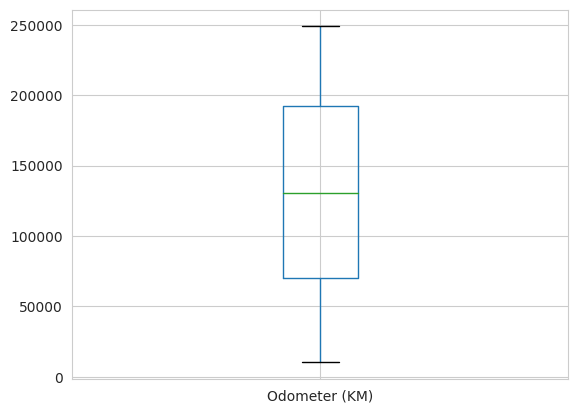

In [ ]:

# Draw a vertical boxplot grouped
# by a categorical variable:
sns.set_style("whitegrid")

#sns.boxplot(x = 'Odometer (KM)', y = 'Price', data = cs.head())
boxplot = X_train.boxplot(column=['Odometer (KM)'])

**Interpreting the boxplot:**

*   Bottom black horizontal line of blue box plot is minimum value
*   First horizontal line of rectangle shape of blue box plot is First quartile or 25%
*   Second (green) horizontal line of rectangle shape of blue box plot is Second quartile or 50% or median.
*   Third horizontal line of rectangle shape of blue box plot is third quartile or 75%
*   Top black horizontal line of rectangle shape of blue box plot is maximum value.
*   Small diamond shape of blue box plot is outlier data or erroneous data


**Standardized dataset**

In [ ]:
X_train_stand.describe()

Odometer (KM)     Doors  Make_new  Colour_new
count       8.00e+02  8.00e+02    800.00      800.00
mean       -6.22e-17  2.04e-16      1.88        2.37
std         1.00e+00  1.00e+00      1.04        1.49
min        -1.74e+00 -2.61e+00      0.00        0.00
25%        -8.75e-01 -3.54e-02      1.00        1.00
50%        -3.16e-03 -3.54e-02      2.00        2.00
75%         8.92e-01 -3.54e-02      3.00        4.00
max         1.71e+00  2.54e+00      3.00        4.00

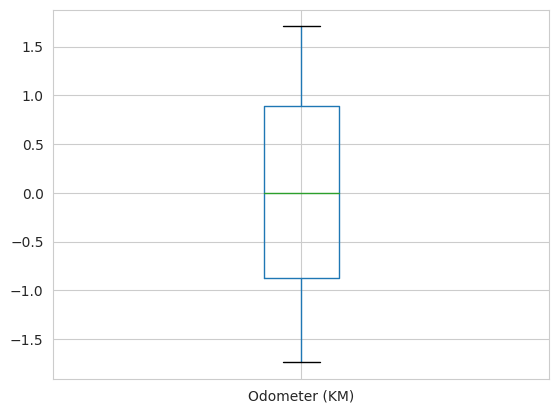

In [ ]:

# Draw a vertical boxplot grouped
# by a categorical variable:
sns.set_style("whitegrid")

#sns.boxplot(x = 'Odometer (KM)', y = 'Price', data = cs.head())
boxplot = X_train_stand.boxplot(column=['Odometer (KM)'])

**Normalized Dataset**

In [ ]:
X_train_norm.describe()

Odometer (KM)   Doors  Make_new  Colour_new
count         800.00  800.00    800.00      800.00
mean            0.51    0.51      0.63        0.59
std             0.29    0.19      0.35        0.37
min             0.00    0.00      0.00        0.00
25%             0.25    0.50      0.33        0.25
50%             0.50    0.50      0.67        0.50
75%             0.76    0.50      1.00        1.00
max             1.00    1.00      1.00        1.00

In [ ]:
X_train_norm.info()

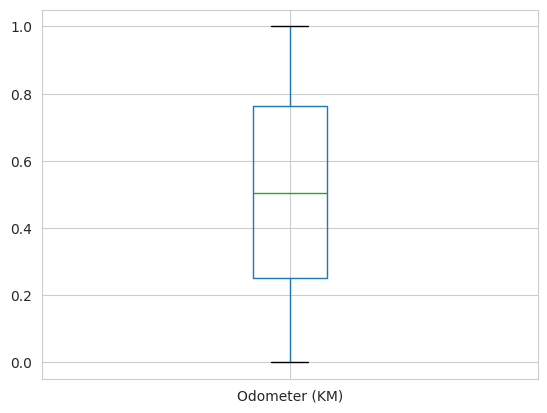

In [ ]:

# Draw a vertical boxplot grouped
# by a categorical variable:
sns.set_style("whitegrid")
boxplot = X_train_norm.boxplot(column=['Odometer (KM)'])

End!